In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import load_neugebauer, InkGamut, Neugebauer, km_mix, bucket_points, max_dist, sort_buckets, get_metamers

In [3]:
import colour
colour_d50 = colour.SDS_ILLUMINANTS.get('D50')
d50 = Spectra(data=colour_d50.values / 103.003, wavelengths=colour_d50.wavelengths)

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)
trichromat = Observer.trichromat(illuminant=d50)
tetrachromat = Observer.tetrachromat(illuminant=d50)

In [5]:
tetrachromat_c = Observer.tetrachromat()

In [6]:
cmy_primaries_dict = {}
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra

In [7]:
paper = cmy_primaries_dict["000"]
cyan = cmy_primaries_dict["100"]
magenta = cmy_primaries_dict["010"]
yellow = cmy_primaries_dict["001"]

## Brute forcing metamers

In [8]:
CMYPOO = {}
with open(f'PeachHaze,Opportunity,OOO.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            
            CMYPOO[name] = spectra

In [9]:
cmypoo_neugebauer = Neugebauer(CMYPOO)

In [14]:
cmypoo_gamut = InkGamut(cmypoo_neugebauer, illuminant=d50)

In [15]:
cmypoo_buckets_10 = cmypoo_gamut.get_buckets(tetrachromat)

[  4.48575988   9.00487457   9.04759828  11.02469504]


Generating Point Cloud: 100%|███████████| 1771561/1771561 [00:27<00:00, 64766.12it/s]


Point cloud generated.


In [142]:
for d, (a,b) in cmypoo_buckets_10[:10]:
    print([round(1000*_a)/10 for _a in a], end=",\t")
    print([round(1000*_b)/10 for _b in b])

[0.0, 0.0, 30.0, 0.0, 70.0, 60.0],	[20.0, 0.0, 0.0, 100.0, 0.0, 20.0]
[0.0, 0.0, 60.0, 0.0, 60.0, 60.0],	[20.0, 10.0, 70.0, 80.0, 0.0, 0.0]
[0.0, 0.0, 20.0, 0.0, 70.0, 80.0],	[20.0, 0.0, 30.0, 100.0, 10.0, 0.0]
[0.0, 0.0, 40.0, 0.0, 60.0, 90.0],	[20.0, 0.0, 50.0, 100.0, 0.0, 20.0]
[0.0, 0.0, 30.0, 0.0, 60.0, 90.0],	[20.0, 10.0, 60.0, 90.0, 0.0, 0.0]
[0.0, 10.0, 80.0, 0.0, 60.0, 20.0],	[20.0, 0.0, 50.0, 100.0, 0.0, 0.0]
[0.0, 0.0, 50.0, 0.0, 70.0, 70.0],	[20.0, 0.0, 20.0, 100.0, 0.0, 40.0]
[0.0, 20.0, 90.0, 0.0, 50.0, 50.0],	[20.0, 0.0, 70.0, 100.0, 0.0, 10.0]
[0.0, 10.0, 50.0, 0.0, 70.0, 10.0],	[20.0, 10.0, 0.0, 90.0, 0.0, 10.0]
[0.0, 10.0, 60.0, 0.0, 60.0, 10.0],	[20.0, 0.0, 20.0, 90.0, 0.0, 0.0]


In [16]:
get_width(cmypoo_buckets_10)

NameError: name 'get_width' is not defined

In [139]:
cmypoo_buckets = cmypoo_gamut.get_buckets(tetrachromat, refined=1)

Generating Point Cloud: 100%|███████████| 1771561/1771561 [00:22<00:00, 77341.32it/s]


Point cloud generated.
exploring [ 0.   0.   0.1  0.   0.5  0.4] to [ 0.2  0.2  0.3  0.2  0.7  0.6] and [ 0.   0.   0.   0.8  0.   0. ] to [ 0.2  0.2  0.2  1.   0.2  0.2]


Generating Point Cloud: 100%|███████████| 1771561/1771561 [00:23<00:00, 74431.23it/s]


In [140]:
for d, (a,b) in cmypoo_buckets[:10]:
    print([round(1000*_a)/10 for _a in a], end=",\t")
    print([round(1000*_b)/10 for _b in b])

[0.0, 18.0, 28.0, 0.0, 58.0, 58.0],	[20.0, 2.0, 12.0, 100.0, 0.0, 8.0]
[0.0, 10.0, 18.0, 0.0, 60.0, 52.0],	[20.0, 0.0, 0.0, 94.0, 0.0, 4.0]
[0.0, 18.0, 30.0, 0.0, 56.0, 56.0],	[20.0, 2.0, 18.0, 98.0, 0.0, 4.0]
[0.0, 6.0, 22.0, 0.0, 64.0, 54.0],	[20.0, 0.0, 8.0, 94.0, 2.0, 6.0]
[0.0, 8.0, 12.0, 0.0, 58.0, 60.0],	[20.0, 2.0, 12.0, 90.0, 0.0, 0.0]
[0.0, 6.0, 26.0, 0.0, 60.0, 52.0],	[20.0, 0.0, 12.0, 92.0, 0.0, 2.0]
[0.0, 10.0, 14.0, 0.0, 62.0, 54.0],	[20.0, 2.0, 4.0, 94.0, 2.0, 0.0]
[0.0, 4.0, 22.0, 0.0, 64.0, 60.0],	[20.0, 0.0, 12.0, 92.0, 2.0, 10.0]
[0.0, 6.0, 20.0, 0.0, 68.0, 56.0],	[20.0, 0.0, 0.0, 98.0, 4.0, 6.0]
[0.0, 4.0, 20.0, 0.0, 60.0, 60.0],	[20.0, 0.0, 20.0, 90.0, 2.0, 0.0]


## Single Cell Neug Refinement

In [35]:
cell1 = {}
with open(f'122823.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "cell1": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cell1[name] = spectra

In [37]:
cell1_neugebauer = Neugebauer(cell1)
cell1_gamut = InkGamut(cell1_neugebauer, illuminant=d50)
# cell1_pc, cell1_perc = cell1_gamut.get_point_cloud(tetrachromat, stepsize=0.075)

In [19]:
cell1_pc.shape

(11390625, 4)

In [20]:
cell1_perc.shape

(11390625, 6)

In [27]:
cell1_perc

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.075],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.15 ],
       ..., 
       [ 1.05 ,  1.05 ,  1.05 ,  1.05 ,  1.05 ,  0.9  ],
       [ 1.05 ,  1.05 ,  1.05 ,  1.05 ,  1.05 ,  0.975],
       [ 1.05 ,  1.05 ,  1.05 ,  1.05 ,  1.05 ,  1.05 ]])

In [32]:
cell1_perc = (np.array([0.25, 0.43, 0.5, 0.25, 0.5, 0.5 ]) * cell1_perc) + np.array([0, 0, 0.03, 0, 0.33, 0.33])

In [10]:
np.save("cell1_pc", cell1_pc)
np.save("cell1_perc", cell1_perc)

NameError: name 'cell1_pc' is not defined

In [11]:
cell1_pc = np.load("cell1_pc.npy")
cell1_perc = np.load("cell1_perc.npy")

In [12]:
old_metamers = {}
with open(f'122823.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "old_mets": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        old_metamers[name] = spectra

In [14]:
old_metamers

{'00 10 50 00 60 90': <spectra.Spectra at 0x11fac61d0>,
 '20 00 60 100 00 40': <spectra.Spectra at 0x164bbc890>}

In [19]:
print(tetrachromat.observe(old_metamers["20 00 60 100 00 40"]))
print(tetrachromat_c.observe(old_metamers["20 00 60 100 00 40"]))

[ 0.10424904  0.2697478   0.3367354   0.36828855]
[ 0.07984653  0.25618515  0.32121769  0.35037611]


In [86]:
print(tetrachromat.observe(old_metamers["20 00 60 100 00 40"]))
print(tetrachromat.observe(old_metamers["00 10 50 00 60 90"]))

[ 0.10424904  0.2697478   0.3367354   0.36828855]
[ 0.10207713  0.27010129  0.31618557  0.37521734]


theyre so good. what was I thinking. what was I smoking. Fuck 

In [17]:
target = tetrachromat.observe(old_metamers["20 00 60 100 00 40"])

In [18]:
get_metamers(cell1_pc, target)

[(0.024535348113188749, 3035714),
 (0.024308031106735351, 2274794),
 (0.024270798091348578, 3031889),
 (0.024211525990151972, 2984654),
 (0.023885813501199671, 2276354),
 (0.023833986954925612, 2986214),
 (0.023822134775739412, 2226854),
 (0.023788648661078604, 3035489),
 (0.023747372324245342, 3644789),
 (0.023612654985567583, 2272529),
 (0.023504382927944489, 3031664),
 (0.023400581598228332, 3694289),
 (0.023359484023992183, 2982389),
 (0.023337744590334109, 2984429),
 (0.023282773018914626, 3743564),
 (0.023263993599766775, 2934929),
 (0.023199616895839215, 2225069),
 (0.023147189163644555, 3027839),
 (0.023140448484485876, 3593504),
 (0.023096858414927535, 2933369),
 (0.023067059998762129, 2276129),
 (0.023042844481457381, 2885204),
 (0.023038185811973977, 3035264),
 (0.023028172807507685, 2277914),
 (0.022990422097898255, 2985989),
 (0.022922398481166673, 2226629),
 (0.022880265593800797, 3035263),
 (0.02282772417996759, 2980604),
 (0.022809601885559971, 2978564),
 (0.02280673563

In [22]:
print(cell1_pc[3035714])
print(tetrachromat.observe(old_metamers["20 00 60 100 00 40"]))

[ 0.10792361  0.26370434  0.31220005  0.3617789 ]
[ 0.10424904  0.2697478   0.3367354   0.36828855]


In [23]:
cell1_perc[3035714]

array([ 0.05625,  0.4515 ,  0.555  ,  0.13125,  0.33   ,  0.855  ])

In [27]:
cell1_perc[2274794]

array([ 0.0375,  0.4515,  0.555 ,  0.    ,  0.405 ,  0.855 ])

In [28]:
metamers = {}
with open(f'122823.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "mets": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        metamers[name] = spectra

In [29]:
tetrachromat.observe(metamers["04 45 56 00 40 86"])

array([ 0.09733477,  0.26460707,  0.31359115,  0.37397707])

In [52]:
cell1_pc[2274794]

array([ 0.11134785,  0.26491495,  0.31242737,  0.36407582])

In [30]:
tetrachromat.observe(metamers["20 00 60 100 00 40"])

array([ 0.10267233,  0.27075883,  0.34134754,  0.37602578])

In [31]:
tetrachromat.observe(metamers["20 00 60 100 00 40"]) - tetrachromat.observe(metamers["04 45 56 00 40 86"])

array([ 0.00533756,  0.00615176,  0.02775639,  0.00204872])

In [64]:
cell1_min = np.array([0, 0, 0.03, 0, 0.33, 0.33])
cell1_width =  np.array([0.25, 0.43, 0.5, 0.25, 0.5, 0.5 ])

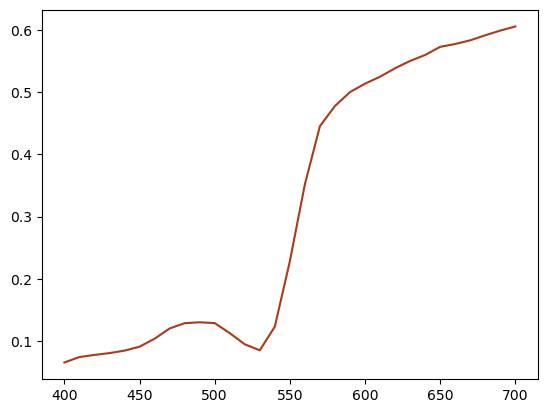

In [66]:
perc1 = np.array([20, 0, 60, 100, 0, 40]) / 100
cmypoo_gamut.get_spectra(perc1).plot()

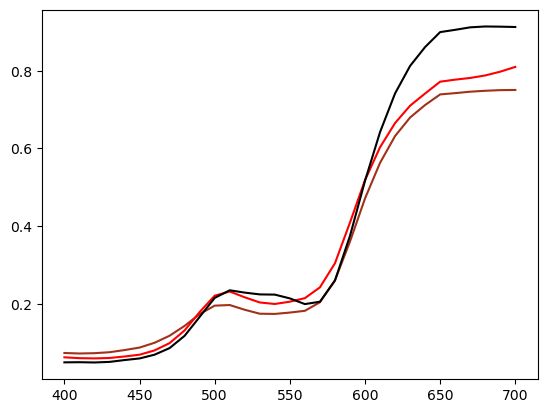

In [70]:
perc2 = np.array([4, 45, 56, 0, 40, 86]) / 100
cmypoo_gamut.get_spectra(perc2).plot()
cell1_gamut.get_spectra((perc2 - cell1_min) / cell1_width ).plot(color='red') # more accurate, cell neug
metamers["04 45 56 00 40 86"].plot(color='black') # observed

In [53]:
cell1_gamut.observe([])

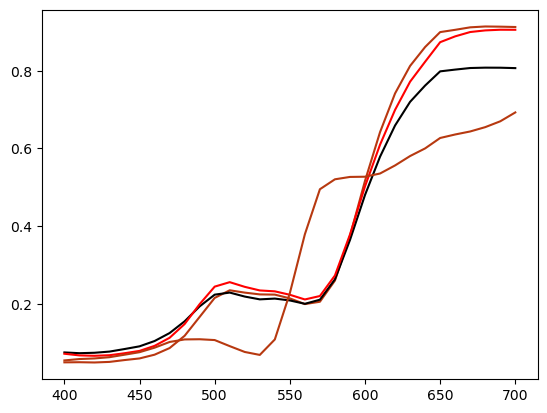

In [84]:
metamers["04 45 56 00 40 86"].plot() # I thought it was 4, 45, 56, 0, 40, 86, but it was actually
actual_perc = np.array([[0, 10, 50, 0, 60, 90]]) / 100
cmypoo_gamut.get_spectra(actual_perc).plot(color='black')
cell1_gamut.get_spectra((actual_perc - cell1_min) / cell1_width ).plot(color='red')
metamers["20 00 60 100 00 40"].plot()

So we accidentally manufactured way better metamers that we wanted, by fucking up the percentages. Jesus christ

Let's check why our simulation didnt find the better metamers.

In [85]:
(actual_perc - cell1_min) / cell1_width 

array([[ 0.        ,  0.23255814,  0.94      ,  0.        ,  0.54      ,
         1.14      ]])

its not that out of bounds, so its pretty annoying that it is so far off

In [87]:
print("Simulation: ", tetrachromat.observe(cmypoo_gamut.get_spectra(actual_perc)))
print("Cell neug simulation: ",tetrachromat.observe(cell1_gamut.get_spectra((actual_perc - cell1_min) / cell1_width )))
print("Actual: ", tetrachromat.observe(metamers["04 45 56 00 40 86"]))
print("second point: ", tetrachromat.observe(metamers["20 00 60 100 00 40"]))

Simulation:  [ 0.13564825  0.25943969  0.30156518  0.35300411]
Cell neug simulation:  [ 0.12485223  0.27630725  0.32019869  0.37574686]
Actual:  [ 0.09733477  0.26460707  0.31359115  0.37397707]
second point:  [ 0.10267233  0.27075883  0.34134754  0.37602578]


My current thoughts: it is probably optimal to do (full) cellular neugebauer for a smaller selection of inks: that is, cyan, peach haze, operation overlord, and opportunity/platinum violet.

Full cell neug would be $3^4 = 81$ combinations.

What are your next steps? 
- make 
- jfc is cell neug even effective

## Recap: I'm the dumbest person I know

To recap what I think happened:
- I printed metamers that the simulated found
- for whatever reason I thought they were shite (on closer inspection, they seem beautiful)
- so I tried a technique to identify better metamers
- Instead of printing these better metamers, I just *reprinted the old ones*
- I looked at this new print (of the old metamers) and saw they were pretty good, and I rejoiced!

## Moving forward

Let's pick a couple low hanging fruit.
1. reprint these (old) metamers. Verify they are still metamers. Sanity check yourself, so you do not go insae.
2. Print the results of "identifying better metamers". See if they are better. 

### Reprint, verify

In [172]:
old_mets_010224 = {}
with open(f'010224.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "OldMets": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        old_mets_010224[name] = spectra

In [173]:
old_mets_010224.keys()

dict_keys(['00 10 50 00 60 90', '20 00 60 100 00 40'])

In [174]:
print(tetrachromat.observe(old_mets_010224["00 10 50 00 60 90"]))
print(tetrachromat.observe(old_mets_010224["20 00 60 100 00 40"]))

[ 0.1074304   0.27392048  0.32351742  0.38481527]
[ 0.10690623  0.27065373  0.34139266  0.37643482]


looking great!

In [176]:
print(tetrachromat.observe(old_metamers["00 10 50 00 60 90"]))
print(tetrachromat.observe(old_metamers["20 00 60 100 00 40"]))


[ 0.10207713  0.27010129  0.31618557  0.37521734]
[ 0.10424904  0.2697478   0.3367354   0.36828855]


Not that close to old calues, but still metamers, which means they show some desired resilliance.

## Actual, new metamers

In [97]:
target = tetrachromat.observe(old_mets_010224["20 00 60 100 00 40"])

In [129]:
ljfeh = get_metamers(cell1_pc, target)

In [134]:
for a, b in ljfeh[:30]:
    print(a, "\t", cell1_perc[b])

0.025862640621 	 [ 0.01875  0.4515   0.555    0.075    0.405    0.855  ]
0.0253558016935 	 [ 0.       0.4515   0.555    0.05625  0.4425   0.855  ]
0.0252510203771 	 [ 0.01875  0.4515   0.555    0.20625  0.3675   0.855  ]
0.0252438916126 	 [ 0.0375   0.4515   0.555    0.05625  0.3675   0.855  ]
0.0252285444426 	 [ 0.01875  0.41925  0.555    0.15     0.405    0.855  ]
0.0250369946754 	 [ 0.0375   0.4515   0.5175   0.16875  0.33     0.855  ]
0.0249663799207 	 [ 0.01875  0.4515   0.555    0.05625  0.405    0.855  ]
0.0249117040295 	 [ 0.0375   0.4515   0.5175   0.01875  0.3675   0.855  ]
0.0249095278047 	 [ 0.01875  0.4515   0.5175   0.16875  0.3675   0.855  ]
0.0248756031798 	 [ 0.      0.4515  0.555   0.1875  0.405   0.855 ]
0.0248515598729 	 [ 0.0375   0.41925  0.555    0.15     0.3675   0.855  ]
0.0247219998911 	 [ 0.0375   0.41925  0.5175   0.2625   0.33     0.855  ]
0.0246436123056 	 [ 0.01875  0.4515   0.5175   0.01875  0.405    0.855  ]
0.0245313390354 	 [ 0.01875  0.4515   0.48   

i bet something went wrong tbh

In [101]:
cell1_perc[1516319]

array([ 0.01875,  0.4515 ,  0.555  ,  0.075  ,  0.405  ,  0.855  ])

In [102]:
cell1_perc[756734]

array([ 0.     ,  0.4515 ,  0.555  ,  0.05625,  0.4425 ,  0.855  ])

We will go with metamer CMYIJK combos of:

**(0, 45, 56, 6, 44, 86)**

and 

**(20, 00, 60, 100, 00, 40)**

In [120]:
print("The original neugebauer would observe the stimulus as ", tetrachromat.observe(cmypoo_gamut.get_spectra((0, 0.45, 0.56, 0.06, 0.44, 0.86))))
print("but cellular observes it as ", cell1_pc[756734] ,".")
print("The target is ", target)

The original neugebauer would observe the stimulus as  [ 0.12599736  0.22902882  0.27487547  0.32654912]
but cellular observes it as  [ 0.11393393  0.26509504  0.31603686  0.37283652] .
The target is  [ 0.10690623  0.27065373  0.34139266  0.37643482]


In [113]:
mets_010224 = {}
with open(f'010224.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Mets": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets_010224[name] = spectra

In [124]:
prwk = np.array((0, 0.45, 0.56, 0.06, 0.44, 0.86))

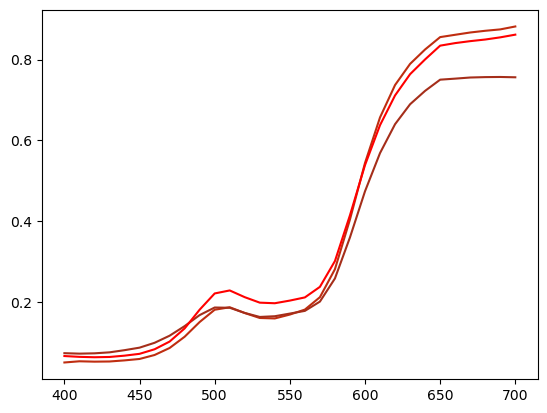

In [127]:
mets_010224["00 45 56 06 44 86"].plot()
cmypoo_gamut.get_spectra(prwk).plot()
cell1_gamut.get_spectra((prwk - cell1_min) / cell1_width ).plot(color='red')

In [115]:
tetrachromat.observe(mets_010224["00 45 56 06 44 86"])

array([ 0.09386063,  0.23759668,  0.2945381 ,  0.35669032])

In [116]:
tetrachromat.observe(mets_010224["20 00 60 100 00 40"])

array([ 0.10044008,  0.26455441,  0.33710554,  0.37369391])

In [128]:
tetrachromat.observe(cell1_gamut.get_spectra((prwk - cell1_min) / cell1_width ))

array([ 0.11340515,  0.26622049,  0.31744309,  0.37399696])

## interlude before violence

In [144]:
sources = {}
with open(f'010224.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Test": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        sources[name] = spectra

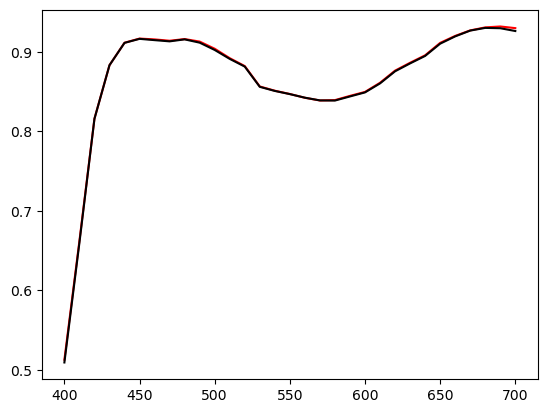

In [148]:
sources["D50"].plot(color='red')
sources["f7 "].plot(color='black')

very good news, the nix scans neednt be redone with a new illuminant. all software. yay

## violence

In [149]:
new_mets_010224 = {}
with open(f'010224.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "NewMets": continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        new_mets_010224[name] = spectra

In [150]:
tetrachromat.observe(new_mets_010224["00 10 18 00 60 52"])

array([ 0.31754248,  0.34677697,  0.38009679,  0.43410876])

In [151]:
tetrachromat.observe(new_mets_010224["20 00 00 94 00 04"])

array([ 0.23410756,  0.29249026,  0.35550682,  0.38849539])

its genuinely so bad what the fuck 

In [154]:
tetrachromat.observe(cmypoo_gamut.get_spectra((0, 0.1, 0.18, 0, 0.6, 0.52)))

array([ 0.25892375,  0.28790011,  0.32252672,  0.37133055])

In [155]:
tetrachromat.observe(cmypoo_gamut.get_spectra((0.2, 0, 0, 0.94, 0, 0.04)))

array([ 0.26058543,  0.29259459,  0.34742568,  0.37565642])

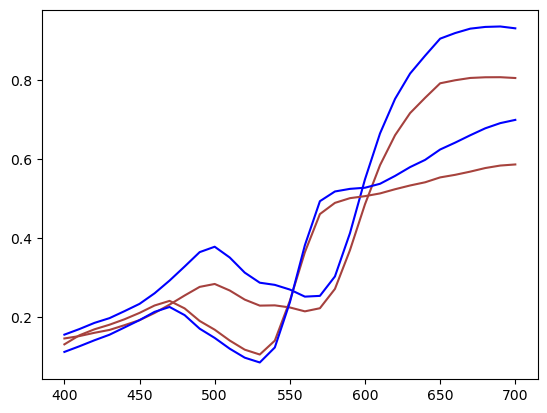

In [157]:
cmypoo_gamut.get_spectra((0, 0.1, 0.18, 0, 0.6, 0.52)).plot()
new_mets_010224["00 10 18 00 60 52"].plot(color='blue')
cmypoo_gamut.get_spectra((0.2, 0, 0, 0.94, 0, 0.04)).plot()
new_mets_010224["20 00 00 94 00 04"].plot(color='blue')


In [177]:
tetrachromat.observe(cmypoo_gamut.get_spectra((0, 0.1, 0.5, 0, 0.6, 0.9)))

array([ 0.13564825,  0.25943969,  0.30156518,  0.35300411])

In [178]:
tetrachromat.observe(cmypoo_gamut.get_spectra((0.2, 0, 0.6, 1, 0, 0.4)))

array([ 0.1255046 ,  0.2673112 ,  0.33018575,  0.36246351])

In [188]:
0.33018575-0.30156518

0.028620570000000012

In [179]:
tetrachromat.observe(old_mets_010224["00 10 50 00 60 90"])

array([ 0.1074304 ,  0.27392048,  0.32351742,  0.38481527])

In [180]:
tetrachromat.observe(old_mets_010224["20 00 60 100 00 40"])

array([ 0.10690623,  0.27065373,  0.34139266,  0.37643482])

In [183]:
0.34139266-0.32351742

0.017875240000000014

In [181]:
tetrachromat.observe(old_metamers["00 10 50 00 60 90"])

array([ 0.10207713,  0.27010129,  0.31618557,  0.37521734])

In [182]:
tetrachromat.observe(old_metamers["20 00 60 100 00 40"])

array([ 0.10424904,  0.2697478 ,  0.3367354 ,  0.36828855])

In [184]:
0.3367354-0.31618557

0.02054982999999999

In [185]:
tetrachromat.observe(metamers["04 45 56 00 40 86"])

array([ 0.09733477,  0.26460707,  0.31359115,  0.37397707])

In [186]:
tetrachromat.observe(metamers["20 00 60 100 00 40"])

array([ 0.10267233,  0.27075883,  0.34134754,  0.37602578])

In [187]:
0.34134754-0.31359115

0.02775639000000002